# K-Means Clustering 

In [1]:
#Import packages 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
#Get data from sklearn 
from sklearn.datasets import make_blobs

In [3]:
blob_centers = np.array([[0.0,2.3],[-1.5, 2.3], [-2.8,1.3],[-2.8,2.8],[-3.1,2.3]])

In [5]:
blob_std = np.array([0.4,0.3,0.1,0.1,0.1])
#Take 2500 samples 
X,y = make_blobs(n_samples=2500, centers=blob_centers, cluster_std=blob_std, random_state=41)

In [8]:
#Plot our blobs 
def plot_clusters(X, y=None):
  plt.scatter(X[:,0],X[:,1], c=y, s=1)

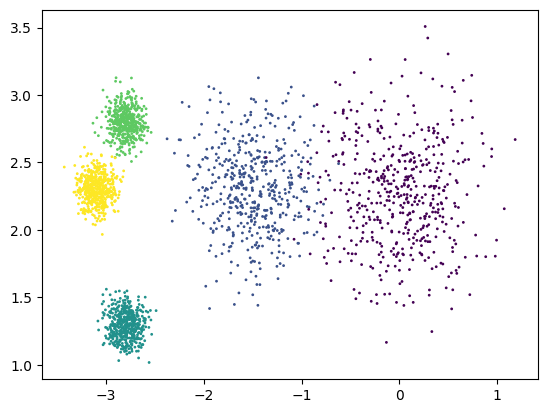

In [9]:
plot_clusters(X,y)

In [10]:
#Train the kmeans model
from sklearn.cluster import KMeans
k=5
kmeans= KMeans(n_clusters=k, random_state=39) 
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=39)

In [11]:
y_pred=kmeans.predict(X)
y_pred

array([3, 3, 2, ..., 0, 4, 4], dtype=int32)

In [12]:
kmeans.labels_

array([3, 3, 2, ..., 0, 4, 4], dtype=int32)

In [13]:
kmeans.cluster_centers_

array([[-1.44692611,  2.3060206 ],
       [-2.78857053,  2.79494367],
       [-2.79227715,  1.29816929],
       [ 0.04887432,  2.27291542],
       [-3.09620663,  2.30238052]])

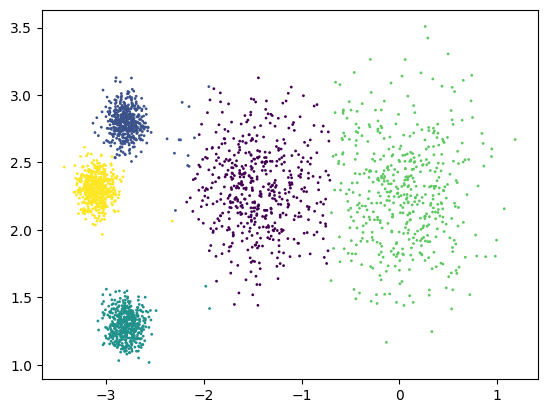

In [14]:
plot_clusters(X, y_pred)

In [23]:
#Plot the centroids 
def plot_centroids(centroids):
  plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=30, linewidths=8, 
              color='w', zorder=10, alpha=0.5)
  plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=50, linewidths=5, 
              color='k', zorder=11, alpha=0.8)

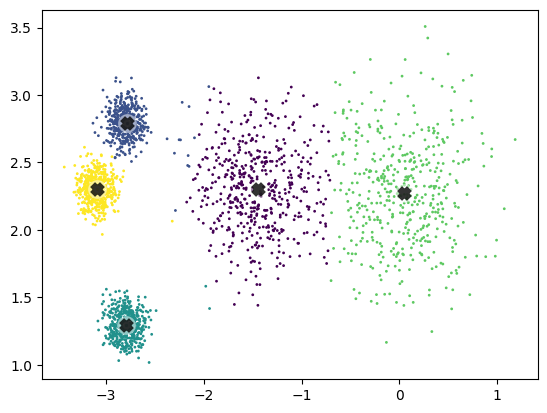

In [24]:
plot_clusters(X, y_pred)
plot_centroids(kmeans.cluster_centers_)

In [25]:
#Try two differnt k values 
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans_k3.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'k=8')

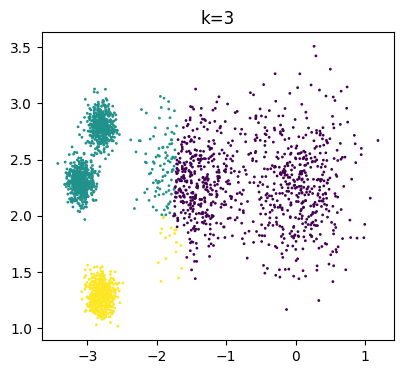

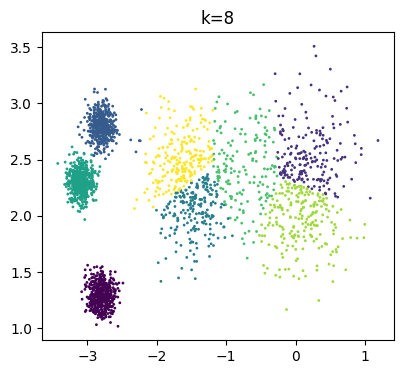

In [26]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plot_clusters(X, y_pred)
plt.title("k=3")
#k=8 
kmeans_k8 = KMeans(n_clusters=8, random_state=42)
y_pred = kmeans_k8.fit_predict(X)
plt.figure(figsize=(10,4))
plt.subplot(122)
plot_clusters(X, y_pred)
plt.title("k=8")

In [27]:
#Check the inertia values 
print(kmeans_k3.inertia_)
print(kmeans.inertia_)
print(kmeans_k8.inertia_)

864.2002429865892
276.3250992693949
160.71862579988334


In [32]:
#Create a list of inertia values 
kmeans_per_k = [KMeans(n_clusters=i, random_state=42).fit(X) for i in range(2,10)]
kmeans_per_k

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42)]

In [33]:
#Calculate inertial for each cluster 
inertias_per_k =[model.inertia_ for model in kmeans_per_k]
inertias_per_k

[1397.1665805559423,
 864.2002429865892,
 360.88315493373716,
 276.3250992693949,
 224.93348993014132,
 188.46635752245044,
 160.71862579988334,
 140.8623925967462]

Text(0.5, 1.0, 'Inertia vs k')

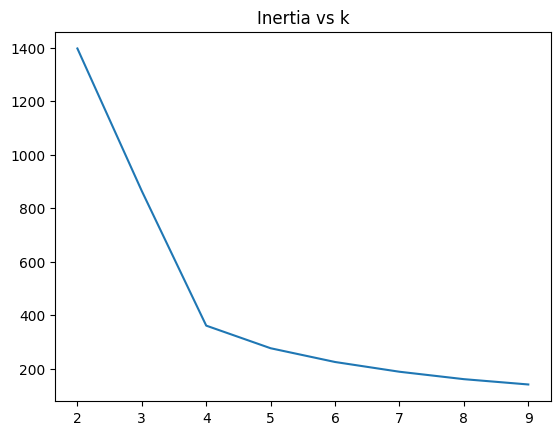

In [34]:
plt.plot(range(2,10), inertias_per_k)
plt.title("Inertia vs k")

In [35]:
#Try silouette score 
from sklearn.metrics import silhouette_score 
silhouette_score(X, kmeans_k3.labels_)

0.6054618858878049

In [37]:
sihouette_score_per_k= [silhouette_score(X, model.labels_) for model in kmeans_per_k]
sihouette_score_per_k

[0.5914052278420541,
 0.6054618858878049,
 0.6606296663581326,
 0.6527142036073772,
 0.598859266631066,
 0.5790177092818626,
 0.568902758820068,
 0.5720752008034273]